In [1]:
#These come from sklearn and there are many tutorials in the docs
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
data = digits['data']
labels = digits['target']

In [4]:
print(data.shape)

(1797, 64)


In [5]:
labels

array([0, 1, 2, ..., 8, 9, 8])

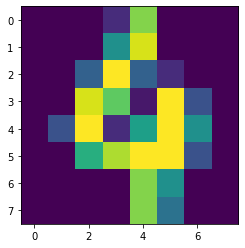

In [6]:
import matplotlib.pyplot as plt
plt.imshow(data[100].reshape(8, 8))

# Dimensionality Reduction:
Here is a 64 dimension dataset

But we notice that some of the pixels are always the same (white)
Others are always connected with the same color

This reduces the number of pixels (dimensions) we need to look at

We do this using a dimensionality reduction algorithm

We can use these to allows us to plot the data or to allow us to 
see what areas are important

In [7]:
from sklearn.decomposition import PCA

#principal component analysis

model = PCA(n_components=2) #Reducing to 2 dim
transformed_data = model.fit_transform(data) #Turn it into plottable data

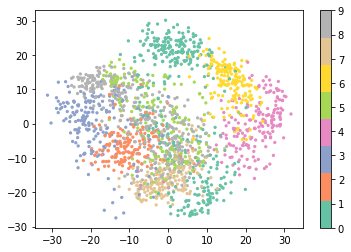

In [8]:
#We will now plot the basis vector representation 
#of the data

#plot the labels as colors

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], \
            s=5, c=labels, cmap=plt.cm.Set2)
plt.colorbar() #They cluster

# So how does PCA Work

It exploits correlations between neighbouring pixels

The correlation matrix is positive-definite and can be diagonalised.

Once you diagonalise the pixels with higher variance tell you more 
about the image. 

You order the eigenvectors by this variance and choose as many as you want

You are finding 2 new variables (principle components) that are uncorrrelated.

You transform into this new subspace

Doesnt always work - it is a linear method

eg. points distributed on a circle - you could transform to r and theta but pca will not see the x y correlation (its non-linear) 



In [9]:
# Can we quantify what info is in these 2 dimensions
#The whole dataset has variance
model.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [10]:
#What happens if we dont reduce it
model = PCA(n_components=64).fit(data)

model.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

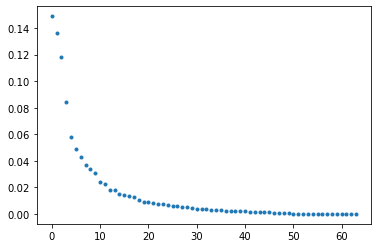

In [11]:
plt.plot(model.explained_variance_ratio_, '.')

#15% of the variance is in the first principal component
#13 in the second etc
#So you only need a few dimensions to do the data

# Nonlinear dimensionality reduction

In [12]:
from sklearn.manifold import TSNE

In [13]:
model = TSNE(n_components=2).fit(data)
transformed_data = model.fit_transform(data)

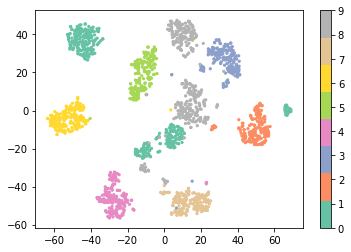

In [14]:
#We will now plot the basis vector representation 
#of the data

#plot the labels as colors

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], \
            s=5, c=labels, cmap=plt.cm.Set2)
plt.colorbar() #They cluster (but you cant always do clustering onit)

# Classification

You want to use the smallest possible model, since on such a small dataset the fancy more powerful models may overfit, since they will just hold all the examples instead of learning what the pixel arrangements means

In [15]:
#Use the dataset to detect the digit in the scan

#Split up the data randomly into training and test sets
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.3) #Use 30% of the data for the test set

In [16]:
#Import SVM
from sklearn.svm import SVC #Supervised learning - support vector classifier

In [17]:
model = SVC()

#training (needs the labels since its supervised)
model.fit(data_train, labels_train)

SVC()

In [18]:
#Predict on the training set
pred_train = model.predict(data_train)

#test 
pred_test = model.predict(data_test)

In [19]:
pred_test #The guess for each image in the tests set

array([8, 7, 1, 9, 8, 9, 9, 7, 9, 3, 7, 3, 6, 8, 8, 0, 7, 3, 3, 7, 5, 2,
       1, 2, 6, 8, 6, 2, 5, 4, 3, 0, 3, 0, 4, 9, 8, 1, 8, 1, 2, 7, 2, 1,
       0, 2, 5, 0, 3, 7, 8, 1, 6, 5, 3, 6, 6, 8, 9, 1, 2, 5, 0, 1, 4, 0,
       7, 9, 5, 8, 8, 9, 3, 1, 4, 3, 7, 3, 0, 9, 3, 3, 5, 7, 0, 1, 3, 5,
       7, 8, 8, 9, 6, 4, 4, 5, 8, 3, 8, 0, 3, 2, 2, 0, 8, 5, 0, 8, 2, 7,
       0, 6, 6, 6, 6, 3, 8, 5, 2, 9, 2, 8, 7, 2, 1, 3, 0, 8, 7, 9, 3, 7,
       4, 7, 6, 3, 5, 2, 6, 9, 0, 4, 7, 3, 0, 1, 6, 4, 3, 2, 2, 2, 8, 9,
       2, 4, 1, 3, 8, 6, 8, 8, 6, 2, 4, 0, 3, 7, 5, 1, 5, 6, 5, 7, 3, 0,
       3, 4, 0, 3, 1, 8, 2, 9, 3, 4, 9, 6, 1, 6, 1, 6, 2, 0, 4, 7, 6, 7,
       2, 8, 6, 9, 4, 1, 1, 7, 6, 3, 4, 2, 0, 9, 7, 2, 4, 4, 9, 7, 2, 0,
       6, 5, 0, 4, 5, 2, 3, 2, 5, 9, 4, 5, 3, 6, 5, 9, 3, 8, 1, 3, 1, 4,
       2, 4, 2, 4, 3, 0, 7, 2, 9, 9, 4, 3, 8, 7, 3, 2, 5, 4, 9, 6, 0, 9,
       6, 4, 0, 7, 0, 8, 7, 3, 4, 1, 7, 8, 9, 4, 6, 3, 2, 1, 3, 1, 3, 0,
       1, 6, 9, 1, 8, 1, 0, 8, 7, 9, 2, 1, 9, 8, 6,

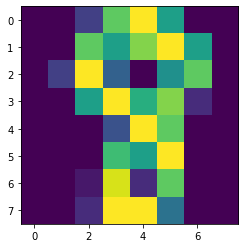

In [20]:
plt.imshow(data_test[0].reshape(8, 8))

In [21]:
print('Expected label:', labels_test[0])
print('Model Prediction:', pred_test[0])

Expected label: 8
Model Prediction: 8


In [22]:
#Define measures that tell wether the model worked or not

#Look at how many cases coincide
#Wrong vs right (1 for right 0 for wrong)
#98% accurate
#Note: this is a balanced set in which you have equal amounts of each
#In some cases (like covid tests) if the model decided everyone is healthy but 99% of people are healthy it doesnt mean its 99% accurate

(labels_test == pred_test).mean()

0.9944444444444445

In [40]:
#mess with hyp params and make it break
#can you break it?
model = SVC()

#training (needs the labels since its supervised)
model.fit(data_train, labels_train)

SVC()

In [41]:
#Predict on the training set
pred_train = model.predict(data_train)

#test 
pred_test = model.predict(data_test)

In [42]:
#only 16% accuracy -  it isnt going to be much less
#than 10% since just guessing would be the same
(labels_test == pred_test).mean()

0.9944444444444445

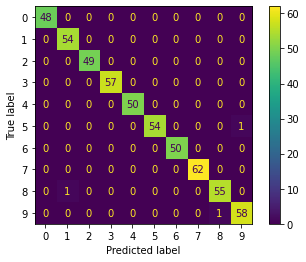

In [43]:
#Confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, data_test, labels_test)

# Removing randomness
- Keep the data the same
- Dont retrain the model